In [70]:
import json
import re
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
with open("benchmark_activation.json") as json_file:
	data = json.load(json_file)['benchmarks']

data

In [66]:
results = {}

for row in data:
	# keys = row['run_name'].split('_')
	keys = re.split('_|/', row['run_name'])
	benchmark_type = keys[1]

	if benchmark_type not in results:
		results[benchmark_type] = {}

	type_results = results[benchmark_type]

	if keys[-1] not in type_results:
		type_results[keys[-1]] = {
			"runtime": {},
			"template": {}
		}

	impl = "template" if "Template" in keys else "runtime"
	benchmark = type_results[keys[-1]][impl]
	benchmark[row['aggregate_name']] = row['cpu_time']

# results

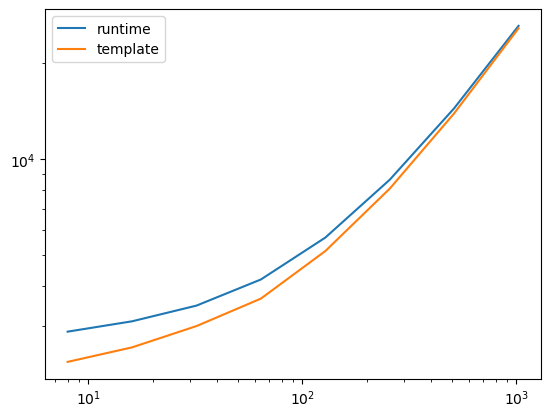

In [65]:
forwardprop_results = results['ForwardProp']
x = [int(n) for n in forwardprop_results.keys()]
runtime_y = [row['runtime']['mean'] for row in forwardprop_results.values()]
template_y = [row['template']['mean'] for row in forwardprop_results.values()]

y = [ runtime_y[i] - template_y[i] for i in range(len(runtime_y)) ]

fig, ax = plt.subplots()

ax.plot(x, runtime_y, label="runtime")
ax.plot(x, template_y, label="template")
ax.legend()
# ax.plot(x, y)
ax.set_xscale('log')
ax.set_yscale('log')

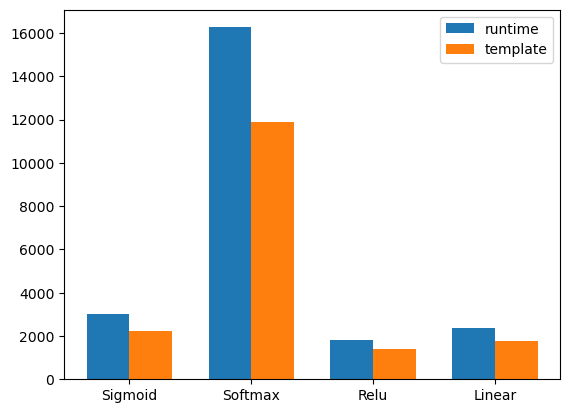

In [73]:
activation_results = results['Activation']
labels = activation_results.keys()
x = np.arange(len(labels))
runtime_vals = [row['runtime']['mean'] for row in activation_results.values()]
template_vals = [row['template']['mean'] for row in activation_results.values()]
width = 0.35

fig, ax = plt.subplots()
runtime_bars = ax.bar(x - width / 2, runtime_vals, width, label="runtime")
template_bars = ax.bar(x + width / 2, template_vals, width, label="template")

ax.set_xticks(x, labels)
ax.legend()